<a href="https://colab.research.google.com/github/ann-macharia/IP-WEEK-6-FIFA-OUTCOME-PREDICTION/blob/master/6_IP_WEEK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> 

The task in this project is to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### b) Defining the Metric for Success

The metric for success in this project will be a well fitted and fairly accurate logistics model that is able to predict the outcome of the football match, given the features that it has learned from.

### c) Understanding the context 

Mchezopesa is a football company that needs to understand how to set its odd for the matches. Analysis of past football data is to be analysed and a model creatd to predict which teams are likely to win.

### d) Recording the Experimental Design

The main aim of the project is to create a predictive model for the football matches. Data cleaning and exploratory data analysis will be done before creating the model and a final documentation of the project.

### e) Data Relevance

The data contains football matches in various tornaments since 1872 all the way to 2018, this means the data is time appropriate. The data contains the scores, the ranking, teams, tournament type. The data contains more than 100,000 rows which means its enough for building a model.

## 2. Reading and checking Dataset 1

In [0]:
#Importing the libraries
import pandas as pd

In [0]:
# Dataset url = http://bit.ly/EcommerceDataset

# Loading the Dataset
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv', parse_dates = ['rank_date'])

#Print out data shape.
print (fifa_ranking.shape)

#Accessing first 5 elements of the table
fifa_ranking.head() 



(57793, 16)


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


# Tidying dataset 1

In [0]:
#Checking for null values.
fifa_ranking.isnull().sum()

#The data has no null values.

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [0]:
#Checking if all the data types are appropriate
fifa_ranking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


In [0]:
#Dhecking for duplicates.
print (fifa_ranking.duplicated().sum())

#Dropping the duplicated values.
fifa_ranking1 = fifa_ranking.drop_duplicates()

#Checking if the duplicates have been dropped.
print (fifa_ranking1.duplicated().sum())



37
0


In [0]:
#Getting a general overview of the data.
fifa_ranking1.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


# Reading and checking dataset 2

In [0]:
# Dataset url = http://bit.ly/EcommerceDataset

#Loading the second dataset.
results=pd.read_csv('/content/results.csv', parse_dates = ['date'])
results.head()

#Print out data shape.
print (results.shape)

#Accessing first 5 elements of the second dataset
results.head() 


(40839, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Tidying dataset 2

In [0]:
#Checking for null values.
results.isnull().sum()

#The data has no null values.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [0]:
#Checking for duplicates.
print (results.duplicated().sum())

#There are no duplcated values.

0


In [0]:
#Checking if all the data types are appropriate
results.info()

#All the datatypes are appropriate.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null datetime64[ns]
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [0]:
#Getting a general overview of the data.
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Merging the two datasets (preparation)



In [0]:
# Before merging, the unimortant columns will be dropped. Year will be extracted
# from the date_time object to enhance merging


# # function to extract the year from the date column
def get_year_month(df, column):
    df["year"] = df[column].apply(lambda x: x.year)
    df["month"] = df[column].apply(lambda x: x.month)
#Applying the function
get_year_month(fifa_ranking1, 'rank_date')
fifa_ranking1.head()

#Dropping unnecessary columns.
fifa_ranking1.drop(fifa_ranking1.columns.difference(['rank','country_full' , 'year', 'month']), 1, inplace=True)
fifa_ranking1.head()

print(fifa_ranking1.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(57756, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
 #Extracting the year fromthe date column.

#Applying the function
get_year_month(results, 'date')
results.head() 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [0]:
#Dropping unnecesary columns
results.drop(['date', 'city', 'country'], axis=1, inplace=True)
results.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,month
0,Scotland,England,0,0,Friendly,False,1872,11
1,England,Scotland,4,2,Friendly,False,1873,3
2,Scotland,England,2,1,Friendly,False,1874,3
3,England,Scotland,2,2,Friendly,False,1875,3
4,Scotland,England,3,0,Friendly,False,1876,3


# Merging the two datasets

In [0]:
#merging the two datasets on the home team

new_merged_home = pd.merge(fifa_ranking1, results, how='inner', left_on=['country_full','year','month'], right_on = ['home_team','year', 'month'] )
new_merged_home.head()

#The rank is renamed to home_rank.
new_merged_home.rename({'rank' : 'home_rank'}, axis = 1, inplace = True)
new_merged_home.head()

,home_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,False
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly,False


In [0]:
#merging the two datasets on the away team
new_merged_away= pd.merge(fifa_ranking1, results, how='inner', left_on=['country_full','year','month'], right_on = ['away_team','year', 'month'] )
new_merged_away.head()

#The rank is renamed to away_rank.
new_merged_away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
new_merged_away.head()

,away_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,False
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,False
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,False


In [0]:
#we drop the unnecessary columns in fifa_away, and put the choosen columns in a new dataframe.

away_teams_ranks = new_merged_away[['away_team','away_rank','year','month']]
away_teams_ranks.head()

,away_team,away_rank,year,month
0,Switzerland,3,1993,8
1,Argentina,5,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Brazil,8,1993,8


In [0]:
#final merge. way_teams_ranks will be merged with new_merged_ homes on the away team and year and month.
final_merge = pd.merge(new_merged_home, away_teams_ranks, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

final_merge.head()


,home_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,neutral,away_rank
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,False,3
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False,12
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False,70
3,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False,70
4,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False,70


# Tidying the merged dataset

In [0]:
#Rearranging the columns to make the data neat.
final_merge = final_merge[['country_full', 'home_team', 'away_team', 'home_score', 'away_score','home_rank','away_rank', 'tournament', 'neutral']]
print (final_merge.shape)
final_merge.head()

(28439, 9)


,country_full,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament,neutral
0,Sweden,Sweden,Switzerland,1,2,4,3,Friendly,False
1,Sweden,Sweden,France,1,1,4,12,FIFA World Cup qualification,False
2,Argentina,Argentina,Peru,2,1,5,70,FIFA World Cup qualification,False
3,Argentina,Argentina,Peru,2,1,5,70,FIFA World Cup qualification,False
4,Argentina,Argentina,Peru,2,1,5,70,FIFA World Cup qualification,False


In [0]:
# Checking for null values.
print (final_merge.isnull().sum())

#The data has no null values.



country_full    0
home_team       0
away_team       0
home_score      0
away_score      0
home_rank       0
away_rank       0
tournament      0
neutral         0
dtype: int64


In [0]:
#Dhecking for duplicates.
print (final_merge.duplicated().sum())

#Dropping the duplicated values.
final_merge1 = final_merge.drop_duplicates()

#Checking if the duplicates have been dropped.
print (final_merge1.duplicated().sum())

#All the duplicates are dropped.

11576
0


In [0]:
#preview of final_merge1.
print (final_merge1.shape)
final_merge1.head()

(16863, 9)


,country_full,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament,neutral
0,Sweden,Sweden,Switzerland,1,2,4,3,Friendly,False
1,Sweden,Sweden,France,1,1,4,12,FIFA World Cup qualification,False
2,Argentina,Argentina,Peru,2,1,5,70,FIFA World Cup qualification,False
5,Colombia,Colombia,Peru,4,0,19,70,FIFA World Cup qualification,False
8,Paraguay,Paraguay,Peru,2,1,67,70,FIFA World Cup qualification,False


# Feature engineering


In [0]:
#We create a new column called goal_difference.
final_merge1['goal_difference'] = final_merge1['home_score'] - final_merge1['away_score']
print(final_merge1.columns)

#we then create another column for home team result depending on the goal difference.
def home_team_result(x):
  if x > 0:
    return 'W'
  elif x < 0:
    return 'L'
  else:
    return 'D'

# creating a new column to give the match oucome
final_merge1['home_team_result'] = final_merge1.goal_difference.apply(lambda x: home_team_result(x))
print(final_merge1.columns)

#label encoding 'home_team_result'
# label encoding.
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
final_merge1['home_team_result'] = label_encoder.fit_transform(final_merge1['home_team_result']) 
  
final_merge1.head()



Index(['country_full', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_rank', 'away_rank', 'tournament', 'neutral', 'goal_difference'],
      dtype='object')
Index(['country_full', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_rank', 'away_rank', 'tournament', 'neutral', 'goal_difference',
       'home_team_result'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,country_full,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament,neutral,goal_difference,home_team_result
0,Sweden,Sweden,Switzerland,1,2,4,3,Friendly,False,-1,1
1,Sweden,Sweden,France,1,1,4,12,FIFA World Cup qualification,False,0,0
2,Argentina,Argentina,Peru,2,1,5,70,FIFA World Cup qualification,False,1,2
5,Colombia,Colombia,Peru,4,0,19,70,FIFA World Cup qualification,False,4,2
8,Paraguay,Paraguay,Peru,2,1,67,70,FIFA World Cup qualification,False,1,2


In [0]:
# Creating a new column to give the type of tournament

def ttype (x):
  if x == 'FIFA World Cup':
    return 'FIFA World Cup'
  if x == 'Friendly':
    return 'Friendly'
  else:
    return 'other'

final_merge1['tournament_type'] = final_merge1.tournament.apply(lambda x: ttype(x))
final_merge1.columns

# Encode labels in column 'species'. 
final_merge1['tournament_type'] = label_encoder.fit_transform(final_merge1['tournament_type']) 
  
final_merge1.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country_full,home_team,away_team,home_score,away_score,home_rank,away_rank,tournament,neutral,goal_difference,home_team_result,tournament_type
0,Sweden,Sweden,Switzerland,1,2,4,3,Friendly,False,-1,1,1
1,Sweden,Sweden,France,1,1,4,12,FIFA World Cup qualification,False,0,0,2
2,Argentina,Argentina,Peru,2,1,5,70,FIFA World Cup qualification,False,1,2,2
5,Colombia,Colombia,Peru,4,0,19,70,FIFA World Cup qualification,False,4,2,2
8,Paraguay,Paraguay,Peru,2,1,67,70,FIFA World Cup qualification,False,1,2,2


In [0]:
# Dropping the unecessary columns.
#dropping tournament column
final_merge1.drop(['tournament', 'goal_difference'], 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Exploratory Data Analysis

##  Univariate analysis

In [0]:
import pandas_profiling as pp
pp.ProfileReport(final_merge1)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,11
Number of observations,16863
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,81.0 B
Numeric,7
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Information from the pandas profiling. Some insights drawn from the pandas profiling include:

Most home games have been in Mexico, followed by Saudi Arabia and in third place is Japan.

Zambia has the highest frequency of being an away team, followed by sweden and in third place paraguay.

Most teams have a score of zero. As the score increases fewer teams are able to reach those scores.

Most of the matches in the data are friendlies.

Most of the home teams have won the matches.

Most of the variables are uncorrelated

## Bivariate analysis


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

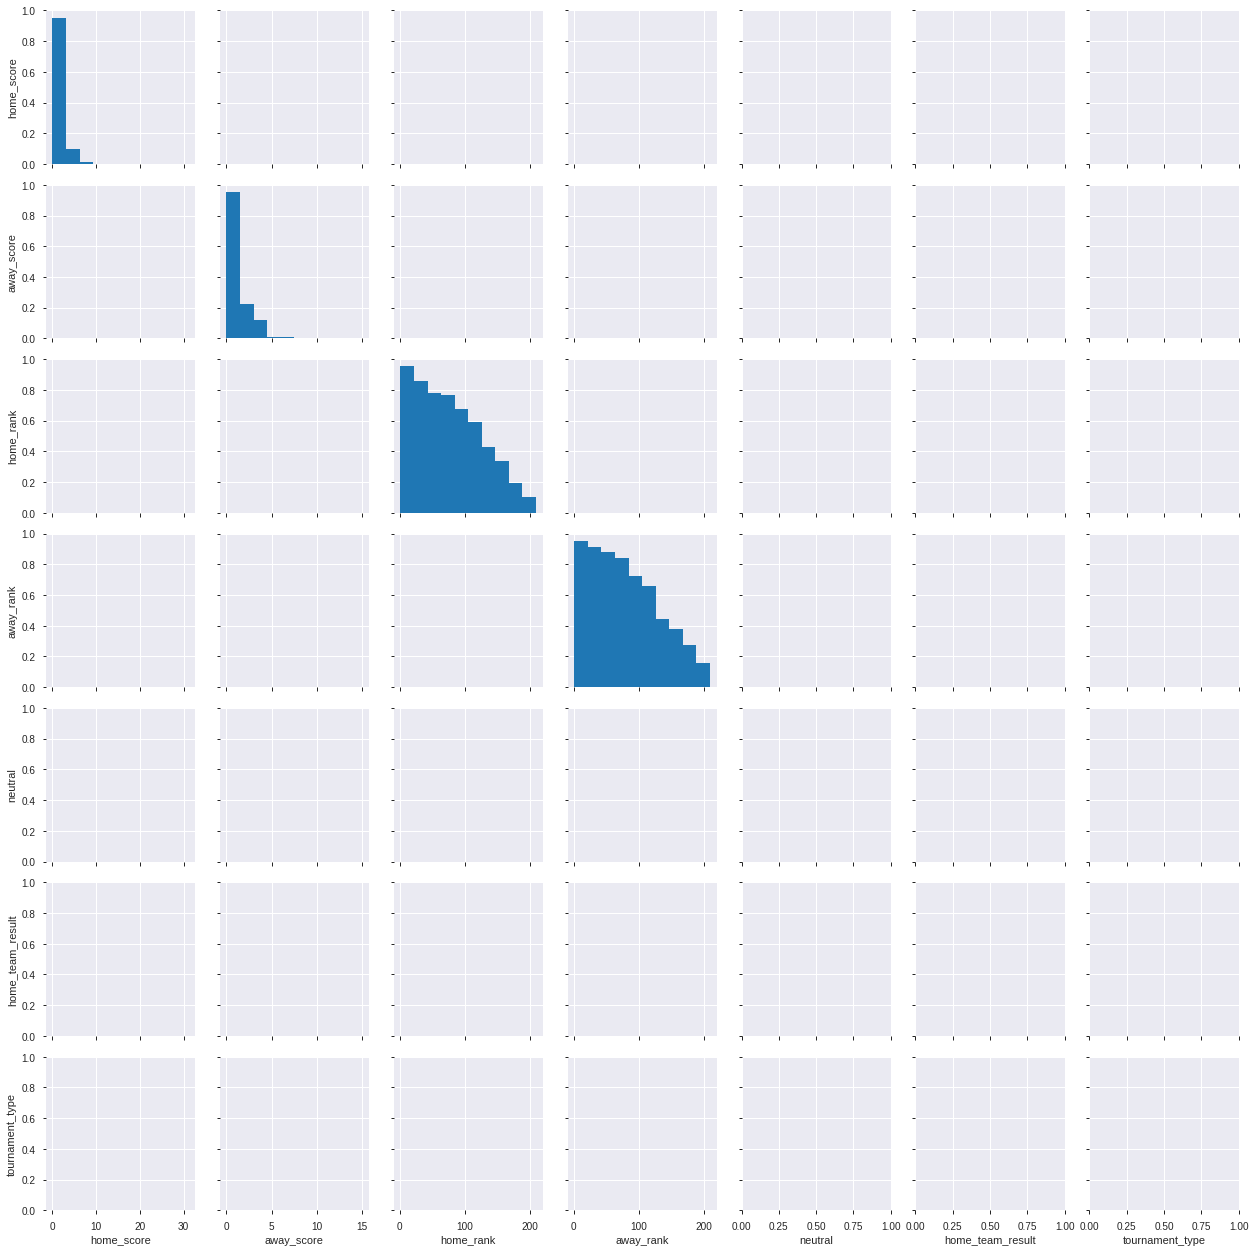

In [0]:
import matplotlib as plot
import seaborn as sns

sns.pairplot(final_merge1)

## Multivariate analysis

In [0]:
#Separating features and labels
X = final_merge1.drop(['country_full', 'home_team_result', 'home_team', 'away_team', 'neutral'], 1)
      
y = final_merge1['home_team_result']



In [0]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(       home_score  away_score  home_rank  away_rank  tournament_type
 15210           2           2          8         16                2
 6738            1           2        111        107                1
 20771           4           0         64        112                1
 25325           3           0        127        126                2
 22386          10           0          1        138                2
 ...           ...         ...        ...        ...              ...
 16238           2           1         15          5                2
 22440           1           0         19         18                1
 17281           0           0        144         29                2
 18606           4           0          6         54                2
 4913            2           0        112        146                2
 
 [13490 rows x 5 columns],
        home_score  away_score  home_rank  away_rank  tournament_type
 21572           1           4         46          6         

In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31602408, 0.27191806, 0.18644661, 0.16364616, 0.06196509])

# 7. Implementing the Solution using polynomial model

#### model 1

Checking for multicollinearity of the independent variables

In [0]:
#previewing the dataset.
final_merge1.head()

,country_full,home_team,away_team,home_score,away_score,home_rank,away_rank,neutral,home_team_result,tournament_type
0,Sweden,Sweden,Switzerland,1,2,4,3,False,1,1
1,Sweden,Sweden,France,1,1,4,12,False,0,2
2,Argentina,Argentina,Peru,2,1,5,70,False,2,2
5,Colombia,Colombia,Peru,4,0,19,70,False,2,2
8,Paraguay,Paraguay,Peru,2,1,67,70,False,2,2


In [0]:
 #Separating features (independent variables) and labels
X = final_merge1[['home_rank',	'away_rank', 'tournament_type']]
      
y = final_merge1['home_team_result']



In [0]:
# Correlation matrix to check for multicollinearity.
corr_matrix = X.corr()
corr_matrix

,home_rank,away_rank,tournament_type
home_rank,1.000000,0.469406,0.135537
away_rank,0.469406,1.000000,0.134889
tournament_type,0.135537,0.134889,1.000000


The above matrix shows how each variable relates to another. The coefficient of 1 across the diagonal shows that a variable is perfectly correlated to itself. The matrix will be used to compute the VIF (Variance Inflation Factor) score for each variable, by finding the inverse matrix of the correlations matrix.

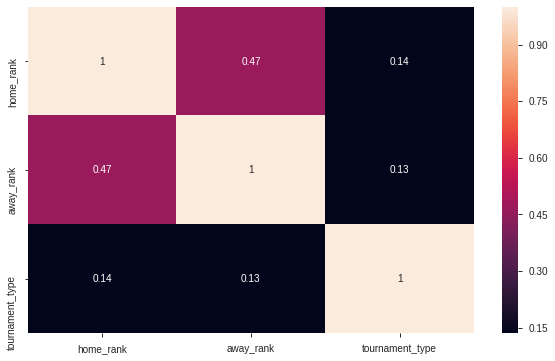

In [0]:
# Creating a heatmap of the vif_matrix to visualise the VIFs
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

most variables are not highyly correlated, which makes them good for modelling

In [0]:
#Checking VIF for the variables
import numpy as np

vif_matrix = pd.DataFrame(np.linalg.inv(corr_matrix.values), index = corr_matrix.index, columns = corr_matrix.columns)
vif_matrix

,home_rank,away_rank,tournament_type
home_rank,1.291413,-0.593383,-0.094994
away_rank,-0.593383,1.291182,-0.093740
tournament_type,-0.094994,-0.093740,1.025520


All the VIFs are less than 5.This means that the vaiables are suitable for model building

### Creating the polynomial model 1

In [0]:
#Separating the independent variables( ranks and tournament) and dependent variable (home_score)
X = final_merge1[['home_rank',	'away_rank', 'tournament_type']]
      
y = final_merge1['home_score']

In [0]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [0]:
# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(include_bias = False, degree = 3)

X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model

poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Prints y-intercept
print(poly_reg.intercept_)

# Prints the beta coefficients in order
print(poly_reg.coef_)


0.9736035999350646
[-1.86043486e-02  3.88282439e-02  3.20783111e-01  2.01852125e-04
 -5.19020014e-05 -6.02628259e-03 -2.08520305e-04 -2.05425740e-02
  1.77485823e-01 -4.36310565e-07 -3.54979651e-07 -1.54575461e-05
  3.04655440e-07  1.56598949e-06  1.88513551e-03  6.79101592e-07
  3.81386160e-05  6.08936460e-03 -1.09108752e-01]


In [0]:
# Making predictions
#
y_pred_hometeam = poly_reg.predict(X_test)
y_pred_hometeam

array([0.81865046, 0.78710933, 1.44901708, ..., 1.75851484, 1.02224143,
       0.82810926])

## Evaluating model 1

In [0]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_hometeam))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_hometeam))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_hometeam)))



Mean Absolute Error: 1.0535570333870332
Mean Squared Error: 2.183953048833813
Root Mean Squared Error: 1.477820370963201


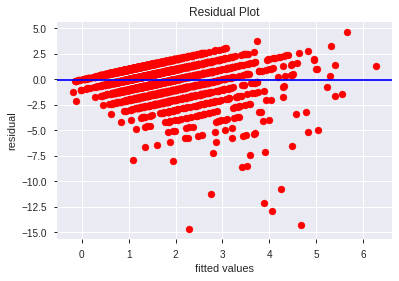

In [0]:
#checking for heteroskedasticity
residuals = y_pred_hometeam - y_test

# Plotting the prediction errors
plt.scatter(y_pred_hometeam, residuals, color='red')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

There is no pattern hence no heteroskedasticity

Cross validation

In [0]:
from sklearn.model_selection import KFold

# We will use the same data we used to train model above 
X = final_merge1[['home_rank',	'away_rank', 'tournament_type']]
      
y = final_merge1['home_score']

#5 fold will be used
folds = KFold(n_splits=5)

# To create and assess 5 models based on the folds created.
RMSES = [] # This array is to keep track of the RMSE's of each model
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count)) 

  # setting up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Fit polynomial Regression to the dataset
  from sklearn.preprocessing import PolynomialFeatures 
  from sklearn.linear_model import LinearRegression

  poly_features = PolynomialFeatures(include_bias = False, degree = 3)

  X_train = poly_features.fit_transform(X_train)
  X_test = poly_features.fit_transform(X_test)

  # Training the model
  poly_reg = LinearRegression()
  poly_reg.fit(X_train, y_train)

  y_pred_hometeam = poly_reg.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred_hometeam))
  RMSES.append(rmse_value)
    
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

  

##  model 2

## creating polynomial model 2

In [0]:
#Separating the independent variables( ranks and tournament) and dependent variable (away_score)
A = final_merge1[['home_rank','away_rank', 'tournament_type']]
      
b = final_merge1['away_score']

In [0]:
#Split the data into a training set and testing set.
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)


In [0]:
# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(include_bias = False, degree = 3)

A_train = poly_features.fit_transform(A_train)
A_test = poly_features.fit_transform(A_test)


# Training the model
poly_reg = LinearRegression()
poly_reg.fit(A_train, b_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Prints y-intercept
print(poly_reg.intercept_)

# Prints the beta coefficients in order
print(poly_reg.coef_)


1.4484310160286746
[ 2.17769011e-02 -2.74211425e-02 -2.61951445e-01 -1.89818550e-04
 -6.25407968e-05 -3.73184700e-04  2.17970088e-04  6.04359068e-03
 -1.42223538e-01  5.09920083e-07  2.17564417e-07  4.56714447e-05
 -5.86551062e-08 -4.63447523e-06 -1.13531658e-03 -5.26043685e-07
 -1.80577071e-05 -1.41740059e-03  9.72322751e-02]


In [0]:
# Making predictions
#
b_pred_awayteam = poly_reg.predict(A_test)
b_pred_awayteam

array([1.5965148 , 2.1335455 , 0.98048545, ..., 0.7612746 , 1.2750263 ,
       1.90686588])

## Evaluating model 2

In [0]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, b_pred_awayteam))
print('Mean Squared Error:', metrics.mean_squared_error(b_test, b_pred_awayteam))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_awayteam)))


Mean Absolute Error: 0.8476827952326927
Mean Squared Error: 1.3002028439241282
Root Mean Squared Error: 1.1402643745746546


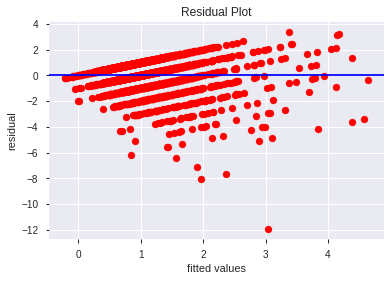

In [0]:
#checking for heteroskedasticity
residuals = b_pred_awayteam - b_test

# Plotting the prediction errors
plt.scatter(b_pred_awayteam, residuals, color='red')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

There is no pattern hence no heteroskedasticity

Cross validation

In [0]:
from sklearn.model_selection import KFold

# We will use the same data we used to train model above 
A = final_merge1[['home_rank',	'away_rank', 'tournament_type']]
      
b = final_merge1['away_score']

#5 fold will be used
folds = KFold(n_splits=5)

# To create and assess 5 models based on the folds created.
RMSES = [] # This array is to keep track of the RMSE's of each model
count = 1
for train_index, test_index in folds.split(A):
  print('\nTraining model ' + str(count)) 

  # setting up the train and test based on the split determined by KFold
  A_train, A_test = A[train_index], A[test_index]
  b_train, b_test = b[train_index], b[test_index]

  # Fit polynomial Regression to the dataset
  from sklearn.preprocessing import PolynomialFeatures 
  from sklearn.linear_model import LinearRegression

  poly_features = PolynomialFeatures(include_bias = False, degree = 3)

  A_train = poly_features.fit_transform(A_train)
  A_test = poly_features.fit_transform(A_test)

  # Training the model
  poly_reg = LinearRegression()
  poly_reg.fit(A_train, b_train)

  b_pred_awayteam = poly_reg.predict(A_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(b_test, y_pred_awayteam))
  RMSES.append(rmse_value)
    
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Predicted scores

In [0]:
pred_scores = pd.DataFrame({'home_pred': y_pred_hometeam, 'away_pred': b_pred_awayteam})
pred_scores

,home_pred,away_pred
0,0.818650,1.596515
1,0.787109,2.133545
2,1.449017,0.980485
3,1.215555,1.189536
4,1.079021,1.346385
...,...,...
3368,1.932948,0.642492
3369,1.999115,0.732188
3370,1.758515,0.761275
3371,1.022241,1.275026


The above dataframe  shows the home predicted scores against the away predicted scores as predicted by the polynomial model

# Implementing solution using logistics model

In [0]:
#previewing the dataset.
final_merge1.head()

#label encoding the home_team_result
 

,country_full,home_team,away_team,home_score,away_score,home_rank,away_rank,neutral,home_team_result,tournament_type
0,Sweden,Sweden,Switzerland,1,2,4,3,False,1,1
1,Sweden,Sweden,France,1,1,4,12,False,0,2
2,Argentina,Argentina,Peru,2,1,5,70,False,2,2
5,Colombia,Colombia,Peru,4,0,19,70,False,2,2
8,Paraguay,Paraguay,Peru,2,1,67,70,False,2,2


In [0]:
#splitting the data into training and testing
 
C = final_merge1.drop(['home_team_result','neutral', 'country_full', 'home_team', 'away_team'], 1)
C

d = final_merge1['home_team_result']
d

0        1
1        0
2        2
5        2
8        2
        ..
28434    2
28435    0
28436    2
28437    0
28438    0
Name: home_team_result, Length: 16863, dtype: int64

In [0]:
#splitting data into training and testing

from sklearn.model_selection import train_test_split
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size = .2, random_state=25)

In [0]:
#fitting the model.
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(C_train, d_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
d_pred = LogReg.predict(C_test)
d_pred
# a=pd.DataFrame({'actual': b_test, 'predicted': b_pred})
# a.head()

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [0]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(d_test, d_pred)
confusion_matrix

array([[ 779,    0,    0],
       [   0,  964,    0],
       [   0,    0, 1630]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(d_test,d_pred)


1.0

In [0]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(d_test, d_pred))
print('Mean Squared Error:', metrics.mean_squared_error(d_test, d_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(d_test, d_pred)))


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


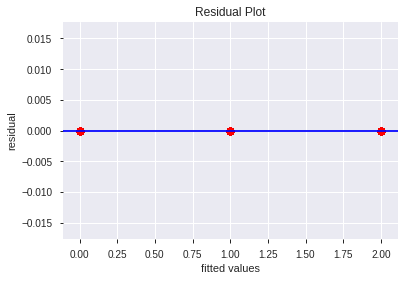

In [0]:
#Checking for heteroskedasticty.
residuals = d_pred - d_test

# Plotting the prediction errors
plt.scatter(d_pred, residuals, color='red')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue')
plt.show()

Model has zero errors and thus all the points on the zero line. There is no heteroskedasticity

# conclusion

The model1 has an rmse of 1.4, model 2 has an rmse 1.1 and the logistics model has a rmse of 0. The logistics model is the best for predicting since it has the lowest error.